In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
df=pd.read_csv(r"C:\Users\vipin\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [169]:
df.shape

(9240, 37)

In [170]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [172]:
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### As the  Prospect ID is not required for the prediction,we can remove the column.

In [173]:
df.drop(df[["Prospect ID"]], axis=1, inplace=True)

#### Since the column names are very big we can reduce it in shorter form

In [174]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### As the column names are not in a proper formate we can rename the columns.

In [175]:
df.rename(columns = {"Lead Number":"Lead_Number",
                     'Lead Origin': 'Lead_Origin', 
                     'Lead Source': 'Lead_Source',
                     'Do Not Email':'Do_Not_Email',
                     'Do Not Call': 'Do_Not_Call',
                     'TotalVisits':'Total_Visits',
                     'Total Time Spent on Website': 'Time_on_Web',
                     'Page Views Per Visit': 'Page_Views_Per_Visit',
                     'Last Activity':'Last_Activity',
                     'How did you hear about X Education': 'How_hear_XEdu',
                     'What is your current occupation': 'current_occupation',
                     'What matters most to you in choosing a course': 'Why_choose',
                     'Newspaper Article': 'News_Article',
                     'X Education Forums':'Edu_Forums',
                     'Digital Advertisement': 'Digi_Adv',
                     'Through Recommendations':'Through_Reco',
                     'Receive More Updates About Our Courses':'More_Updates',
                     'Lead Quality':'Lead_Quality',
                     'Update me on Supply Chain Content':'Update_Supply_Chain',
                     'Get updates on DM Content':'Get_updates_on_DM',
                     'Lead Profile':'Lead_Profile',
                     'Asymmetrique Activity Index':'Asy_Act_Index',
                     'Asymmetrique Profile Index':'Asy_Prof_Index',
                     'Asymmetrique Activity Score':'Asy_Act_Score',
                     'Asymmetrique Profile Score':'Asy_Prof_Score',
                     "I agree to pay the amount through cheque":"agree_amount_cheque",
                     'A free copy of Mastering The Interview':'Mastering_The_Int',
                     'Last Notable Activity':'Last_Notable_Activity'}, inplace = True)

df.head(3)

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_hear_XEdu,current_occupation,Why_choose,Search,Magazine,News_Article,Edu_Forums,Newspaper,Digi_Adv,Through_Reco,More_Updates,Tags,Lead_Quality,Update_Supply_Chain,Get_updates_on_DM,Lead_Profile,City,Asy_Act_Index,Asy_Prof_Index,Asy_Act_Score,Asy_Prof_Score,agree_amount_cheque,Mastering_The_Int,Last_Notable_Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


### Now lest see the count of each values in the categorical columns

In [176]:
df.Do_Not_Email.value_counts()

Do_Not_Email
No     8506
Yes     734
Name: count, dtype: int64

In [177]:
df.Lead_Origin.value_counts()

Lead_Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

## Null value imputation

In [178]:
df.isnull().sum()/len(df)*100

Lead_Number               0.000000
Lead_Origin               0.000000
Lead_Source               0.389610
Do_Not_Email              0.000000
Do_Not_Call               0.000000
Converted                 0.000000
Total_Visits              1.482684
Time_on_Web               0.000000
Page_Views_Per_Visit      1.482684
Last_Activity             1.114719
Country                  26.634199
Specialization           15.562771
How_hear_XEdu            23.885281
current_occupation       29.112554
Why_choose               29.318182
Search                    0.000000
Magazine                  0.000000
News_Article              0.000000
Edu_Forums                0.000000
Newspaper                 0.000000
Digi_Adv                  0.000000
Through_Reco              0.000000
More_Updates              0.000000
Tags                     36.287879
Lead_Quality             51.590909
Update_Supply_Chain       0.000000
Get_updates_on_DM         0.000000
Lead_Profile             29.318182
City                

#### "tags""lead_quality","Asy_Act_Index","Asy_Prof_Index","Asy_Act_Score","Asy_Prof_Score","last_activity","last_notable_activity"are decided after the team contacted the interested applicants. So, we can remove the columns. 

In [179]:
df.drop(["Tags","Lead_Quality","Asy_Act_Index","Asy_Prof_Index","Asy_Act_Score","Asy_Prof_Score","Last_Activity","Last_Notable_Activity"], axis=1, inplace=True)

In [180]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.389610
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Converted                0.000000
Total_Visits             1.482684
Time_on_Web              0.000000
Page_Views_Per_Visit     1.482684
Country                 26.634199
Specialization          15.562771
How_hear_XEdu           23.885281
current_occupation      29.112554
Why_choose              29.318182
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
Lead_Profile            29.318182
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [181]:
num_col=df.select_dtypes(include = "number").columns.tolist() #['int64','float64']
num_col

['Lead_Number',
 'Converted',
 'Total_Visits',
 'Time_on_Web',
 'Page_Views_Per_Visit']

In [182]:
df.rename(columns={"Converted": "Target"}, inplace=True)

In [183]:
df.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Country,Specialization,How_hear_XEdu,current_occupation,Why_choose,Search,Magazine,News_Article,Edu_Forums,Newspaper,Digi_Adv,Through_Reco,More_Updates,Update_Supply_Chain,Get_updates_on_DM,Lead_Profile,City,agree_amount_cheque,Mastering_The_Int
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No


In [184]:
num_col=df.select_dtypes(include = "number").columns.tolist() #['int64','float64']
num_col

['Lead_Number',
 'Target',
 'Total_Visits',
 'Time_on_Web',
 'Page_Views_Per_Visit']

<Axes: >

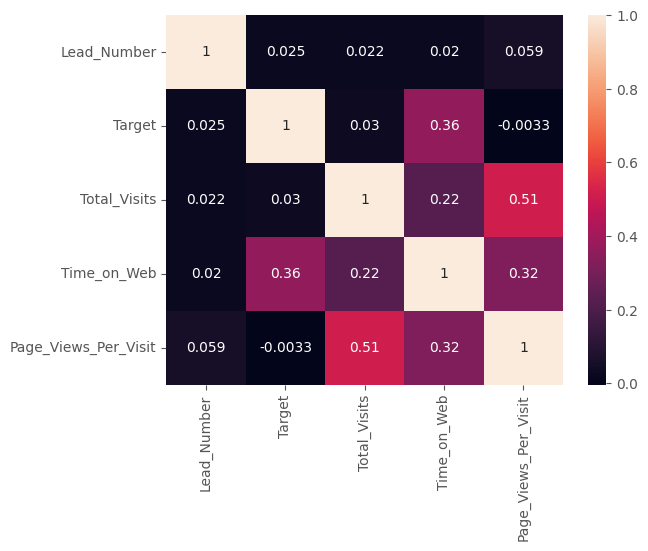

In [185]:
corr_matrix=df[num_col].corr()
sns.heatmap(corr_matrix, annot=True)

#### Since no columns have much correlation we cannot remove any column.

In [186]:
num_col=df.select_dtypes(include = "number").columns.tolist() #['int64','float64']
num_col

['Lead_Number',
 'Target',
 'Total_Visits',
 'Time_on_Web',
 'Page_Views_Per_Visit']

In [187]:
df[num_col].isnull().sum() / len(df[num_col]) * 100

Lead_Number             0.000000
Target                  0.000000
Total_Visits            1.482684
Time_on_Web             0.000000
Page_Views_Per_Visit    1.482684
dtype: float64

In [188]:
df.Total_Visits.value_counts()

Total_Visits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

#### The missing value can be imputed using meadian.

In [189]:
df.Total_Visits.fillna(df.Total_Visits.median(), inplace=True)
df.Total_Visits = df.Total_Visits.astype('int')
df.Page_Views_Per_Visit.fillna(df.Page_Views_Per_Visit.median(), inplace=True)
df.Page_Views_Per_Visit = df.Page_Views_Per_Visit.astype('int')

In [190]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.389610
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Target                   0.000000
Total_Visits             0.000000
Time_on_Web              0.000000
Page_Views_Per_Visit     0.000000
Country                 26.634199
Specialization          15.562771
How_hear_XEdu           23.885281
current_occupation      29.112554
Why_choose              29.318182
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
Lead_Profile            29.318182
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [191]:
df.Lead_Source.value_counts()

Lead_Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [192]:
df.Lead_Source.fillna(df.Lead_Source.mode()[0], inplace=True)

In [193]:
df.Lead_Source.value_counts()

Lead_Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [194]:
df.isnull().sum()

Lead_Number                0
Lead_Origin                0
Lead_Source                0
Do_Not_Email               0
Do_Not_Call                0
Target                     0
Total_Visits               0
Time_on_Web                0
Page_Views_Per_Visit       0
Country                 2461
Specialization          1438
How_hear_XEdu           2207
current_occupation      2690
Why_choose              2709
Search                     0
Magazine                   0
News_Article               0
Edu_Forums                 0
Newspaper                  0
Digi_Adv                   0
Through_Reco               0
More_Updates               0
Update_Supply_Chain        0
Get_updates_on_DM          0
Lead_Profile            2709
City                    1420
agree_amount_cheque        0
Mastering_The_Int          0
dtype: int64

In [195]:
df.Country.value_counts(dropna = False, normalize=True)

Country
India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sr

#### More than 96% of the data are either india or NaN, we can drop the column

In [196]:
df.drop("Country", axis=1, inplace=True)

In [197]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.000000
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Target                   0.000000
Total_Visits             0.000000
Time_on_Web              0.000000
Page_Views_Per_Visit     0.000000
Specialization          15.562771
How_hear_XEdu           23.885281
current_occupation      29.112554
Why_choose              29.318182
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
Lead_Profile            29.318182
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [198]:
df.Specialization.value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

## it can be viewed that select is also NAN 

In [199]:
df.Specialization.replace("Select", np.nan, inplace=True)

In [200]:
df.Specialization.value_counts(dropna=False, normalize=True)

Specialization
NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64

### Now, we can make sub categories so that the sudy will be more accurate

In [201]:
# categorize all management courses
df.loc[(df.Specialization == 'Finance Management') | (df.Specialization == 'Human Resource Management') | 
       (df.Specialization == 'Marketing Management') |  (df.Specialization == 'Operations Management') |
       (df.Specialization == 'IT Projects Management') | (df.Specialization == 'Supply Chain Management') |
       (df.Specialization == 'Healthcare Management') | (df.Specialization == 'Hospitality Management') |
       (df.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.Specialization == 'Business Administration') | (df.Specialization == 'International Business') | 
       (df.Specialization == 'Rural and Agribusiness') | (df.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.Specialization == 'Banking, Investment And Insurance') | (df.Specialization == 'Media and Advertising') |
       (df.Specialization == 'Travel and Tourism') | (df.Specialization == 'Services Excellence') |
       (df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [202]:
df.Specialization.value_counts(dropna=False, normalize=True)

Specialization
Management Specializations    0.460281
NaN                           0.365801
Industry Specializations      0.096970
Business Specializations      0.076948
Name: proportion, dtype: float64

#### We can impute the missing values with the persentatge of values in each specialization.

In [203]:
df.Specialization.value_counts( normalize=True)

Specialization
Management Specializations    0.725768
Industry Specializations      0.152901
Business Specializations      0.121331
Name: proportion, dtype: float64

In [204]:
# impute proportionately
df['Specialization'] = df.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations',
                                                                            'Business Specializations',
                                                                            'Industry Specializations'],
                                                                           p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

In [205]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.000000
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Target                   0.000000
Total_Visits             0.000000
Time_on_Web              0.000000
Page_Views_Per_Visit     0.000000
Specialization           0.000000
How_hear_XEdu           23.885281
current_occupation      29.112554
Why_choose              29.318182
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
Lead_Profile            29.318182
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [206]:
df.How_hear_XEdu.value_counts(dropna=False)

How_hear_XEdu
Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [207]:
df.How_hear_XEdu.replace("Select", np.nan, inplace=True)

In [208]:
df.How_hear_XEdu.value_counts(dropna=False, normalize=True)

How_hear_XEdu
NaN                      0.784632
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: proportion, dtype: float64

### Since the column have more than 78% of missing values, we can remove the column

In [209]:
df.drop("How_hear_XEdu", axis=1, inplace=True)

In [210]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.000000
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Target                   0.000000
Total_Visits             0.000000
Time_on_Web              0.000000
Page_Views_Per_Visit     0.000000
Specialization           0.000000
current_occupation      29.112554
Why_choose              29.318182
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
Lead_Profile            29.318182
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [211]:
df.current_occupation.value_counts(dropna=False)

current_occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [212]:
# combine low representing categories
df.loc[(df.current_occupation == 'Student') | (df.current_occupation == 'Other') | (df.current_occupation == 'Housewife') | 
       (df.current_occupation == 'Businessman') , 'current_occupation'] = 'Student and Others'

In [213]:
df.current_occupation.value_counts(normalize=True)

current_occupation
Unemployed              0.854962
Working Professional    0.107786
Student and Others      0.037252
Name: proportion, dtype: float64

In [214]:
# impute proportionately
df['current_occupation'] = df.current_occupation.fillna(pd.Series(np.random.choice(['Unemployed',
                                                                            'Working Professional',
                                                                            'Student and Others'],
                                                                           p = [0.854962, 0.107786, 0.037252 ], size = len(df))))

In [215]:
df.current_occupation.value_counts()

current_occupation
Unemployed              7902
Working Professional     983
Student and Others       355
Name: count, dtype: int64

In [216]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.000000
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Target                   0.000000
Total_Visits             0.000000
Time_on_Web              0.000000
Page_Views_Per_Visit     0.000000
Specialization           0.000000
current_occupation       0.000000
Why_choose              29.318182
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
Lead_Profile            29.318182
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [217]:
df.Why_choose.value_counts(dropna=False, normalize=True)

Why_choose
Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: proportion, dtype: float64

#### Clearly we can drop the column as nan + Better Career Prospects is about 100% 

In [218]:
df.drop("Why_choose", axis=1, inplace=True)

In [219]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.000000
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Target                   0.000000
Total_Visits             0.000000
Time_on_Web              0.000000
Page_Views_Per_Visit     0.000000
Specialization           0.000000
current_occupation       0.000000
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
Lead_Profile            29.318182
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [220]:
df.Lead_Profile.value_counts(dropna=False, normalize=True)

Lead_Profile
Select                         0.448701
NaN                            0.293182
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: proportion, dtype: float64

#### Select is also represents nan so a total of more than 70% is NaN.So we can remove the column.

In [221]:
df.drop("Lead_Profile", axis=1, inplace=True)

In [222]:
df.isnull().sum()/len(df)*100

Lead_Number              0.000000
Lead_Origin              0.000000
Lead_Source              0.000000
Do_Not_Email             0.000000
Do_Not_Call              0.000000
Target                   0.000000
Total_Visits             0.000000
Time_on_Web              0.000000
Page_Views_Per_Visit     0.000000
Specialization           0.000000
current_occupation       0.000000
Search                   0.000000
Magazine                 0.000000
News_Article             0.000000
Edu_Forums               0.000000
Newspaper                0.000000
Digi_Adv                 0.000000
Through_Reco             0.000000
More_Updates             0.000000
Update_Supply_Chain      0.000000
Get_updates_on_DM        0.000000
City                    15.367965
agree_amount_cheque      0.000000
Mastering_The_Int        0.000000
dtype: float64

In [223]:
df.City.value_counts(dropna=False, normalize=True)

City
Mumbai                         0.348701
Select                         0.243398
NaN                            0.153680
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: proportion, dtype: float64

In [224]:
df.loc[(df.City == 'Thane & Outskirts') | (df.City == 'Other Cities of Maharashtra'), 
       'City'] = 'Non-Mumbai Maharashtra Cities'

df.loc[(df.City == 'Other Cities') | (df.City == 'Other Metro Cities') | (df.City == 'Tier II Cities') , 
       'City'] = 'Non-Maharashtra Cities'

In [225]:
df.replace("Select", np.nan, inplace=True)

In [226]:
df.City.value_counts(normalize=True)

City
Mumbai                           0.578352
Non-Mumbai Maharashtra Cities    0.217017
Non-Maharashtra Cities           0.204631
Name: proportion, dtype: float64

In [227]:
# impute proportionately
df['City'] = df.City.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

In [228]:
df.isnull().sum()/len(df)*100

Lead_Number             0.0
Lead_Origin             0.0
Lead_Source             0.0
Do_Not_Email            0.0
Do_Not_Call             0.0
Target                  0.0
Total_Visits            0.0
Time_on_Web             0.0
Page_Views_Per_Visit    0.0
Specialization          0.0
current_occupation      0.0
Search                  0.0
Magazine                0.0
News_Article            0.0
Edu_Forums              0.0
Newspaper               0.0
Digi_Adv                0.0
Through_Reco            0.0
More_Updates            0.0
Update_Supply_Chain     0.0
Get_updates_on_DM       0.0
City                    0.0
agree_amount_cheque     0.0
Mastering_The_Int       0.0
dtype: float64

## Now we can see there is no null values

## Categorical column Imbalance

In [229]:
cat_col=df.select_dtypes(include="object").columns.tolist()
cat_col

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Specialization',
 'current_occupation',
 'Search',
 'Magazine',
 'News_Article',
 'Edu_Forums',
 'Newspaper',
 'Digi_Adv',
 'Through_Reco',
 'More_Updates',
 'Update_Supply_Chain',
 'Get_updates_on_DM',
 'City',
 'agree_amount_cheque',
 'Mastering_The_Int']

In [230]:
df.Lead_Origin.value_counts(normalize=True, dropna=False)

Lead_Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64

In [231]:
df.loc[(df.Lead_Origin == 'Lead Import') | (df.Lead_Origin == 'Quick Add Form') | (df.Lead_Origin == 'Lead Add Form')
       , 'Lead_Origin'] = 'Lead Add Form and Others'

In [232]:
df.Lead_Origin.value_counts(normalize=True, dropna=False)

Lead_Origin
Landing Page Submission     0.528788
API                         0.387446
Lead Add Form and Others    0.083766
Name: proportion, dtype: float64

In [233]:
df.Lead_Source.value_counts(normalize=True, dropna=False)

Lead_Source
Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64

In [234]:
df.loc[(df.Lead_Source == 'Reference')        | (df.Lead_Source == 'Welingak Website') 
       | (df.Lead_Source == 'Referral Sites') | (df.Lead_Source == 'Facebook')
       | (df.Lead_Source == 'bing') | (df.Lead_Source == 'google')
       | (df.Lead_Source == 'Click2call') | (df.Lead_Source == 'Press_Release')
       | (df.Lead_Source == 'youtubechannel') | (df.Lead_Source == 'testone')
       | (df.Lead_Source == 'Pay per Click Ads') | (df.Lead_Source == 'welearnblog_Home')
       | (df.Lead_Source == 'WeLearn') | (df.Lead_Source == 'blog')| (df.Lead_Source == 'NC_EDM')
       | (df.Lead_Source == 'Social Media') | (df.Lead_Source == 'Live Chat')
       , 'Lead_Source'] = 'Reference and Others'

In [235]:
df.Lead_Source.value_counts(normalize=True, dropna=False)

Lead_Source
Google                  0.314286
Direct Traffic          0.275216
Olark Chat              0.189935
Organic Search          0.124892
Reference and Others    0.095671
Name: proportion, dtype: float64

In [236]:
df.Do_Not_Call.value_counts(normalize=True, dropna=False)

Do_Not_Call
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [237]:
cat_col=df.select_dtypes(include="object").columns.tolist()
cat_col

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Specialization',
 'current_occupation',
 'Search',
 'Magazine',
 'News_Article',
 'Edu_Forums',
 'Newspaper',
 'Digi_Adv',
 'Through_Reco',
 'More_Updates',
 'Update_Supply_Chain',
 'Get_updates_on_DM',
 'City',
 'agree_amount_cheque',
 'Mastering_The_Int']

In [238]:
df.Specialization.value_counts(normalize=True, dropna=False)

Specialization
Management Specializations    0.723485
Industry Specializations      0.155628
Business Specializations      0.120887
Name: proportion, dtype: float64

In [239]:
df.current_occupation.value_counts(normalize=True, dropna=False)

current_occupation
Unemployed              0.855195
Working Professional    0.106385
Student and Others      0.038420
Name: proportion, dtype: float64

In [240]:
df.Search.value_counts(normalize=True, dropna=False)

Search
No     0.998485
Yes    0.001515
Name: proportion, dtype: float64

In [241]:
df.Magazine.value_counts(normalize=True, dropna=False)

Magazine
No    1.0
Name: proportion, dtype: float64

In [242]:
df.Newspaper.value_counts(normalize=True, dropna=False)

Newspaper
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64

In [243]:
df.Digi_Adv.value_counts(normalize=True, dropna=False)

Digi_Adv
No     0.999567
Yes    0.000433
Name: proportion, dtype: float64

In [244]:
df.Through_Reco.value_counts(normalize=True, dropna=False)

Through_Reco
No     0.999242
Yes    0.000758
Name: proportion, dtype: float64

In [245]:
df.More_Updates.value_counts(normalize=True, dropna=False)

More_Updates
No    1.0
Name: proportion, dtype: float64

In [246]:
df.Update_Supply_Chain.value_counts(normalize=True, dropna=False)

Update_Supply_Chain
No    1.0
Name: proportion, dtype: float64

In [247]:
df.City.value_counts(normalize=True, dropna=False)

City
Mumbai                           0.583766
Non-Mumbai Maharashtra Cities    0.217100
Non-Maharashtra Cities           0.199134
Name: proportion, dtype: float64

In [248]:
df.Mastering_The_Int.value_counts(normalize=True, dropna=False)

Mastering_The_Int
No     0.687446
Yes    0.312554
Name: proportion, dtype: float64

In [249]:
df.Get_updates_on_DM.value_counts(normalize=True, dropna=False)

Get_updates_on_DM
No    1.0
Name: proportion, dtype: float64

In [250]:
df.News_Article.value_counts(normalize=True, dropna=False)

News_Article
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [251]:
df.Edu_Forums.value_counts(normalize=True, dropna=False)

Edu_Forums
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64

In [252]:
df.agree_amount_cheque.value_counts(normalize=True, dropna=False)

agree_amount_cheque
No    1.0
Name: proportion, dtype: float64

#### Due to heavy imbalance we can remove the columns 'Do_Not_Call','Search', 'Magazine','News_Article', 'Edu_Forums', 'Newspaper', 'Digi_Adv', 'Through_Reco', 'More_Updates', 'Update_Supply_Chain','Get_updates_on_DM'ovethe columns 

In [253]:
df.head(1)

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Specialization,current_occupation,Search,Magazine,News_Article,Edu_Forums,Newspaper,Digi_Adv,Through_Reco,More_Updates,Update_Supply_Chain,Get_updates_on_DM,City,agree_amount_cheque,Mastering_The_Int
0,660737,API,Olark Chat,No,No,0,0,0,0,Management Specializations,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [254]:
del_col=[ 'Do_Not_Call',
 'Search',
 'Magazine',
 'News_Article',
 'Edu_Forums',
 'Newspaper',
 'Digi_Adv',
 'Through_Reco',
 'More_Updates',
 'Update_Supply_Chain',
 'Get_updates_on_DM']

In [255]:
df.drop(del_col, axis=1, inplace=True)

In [256]:
df.drop("agree_amount_cheque", axis=1, inplace=True)

In [257]:
df.shape

(9240, 12)

In [258]:
df.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Specialization,current_occupation,City,Mastering_The_Int
0,660737,API,Olark Chat,No,0,0,0,0,Management Specializations,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5,674,2,Management Specializations,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Business Specializations,Student and Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Industry Specializations,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Management Specializations,Unemployed,Mumbai,No


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Lead_Number           9240 non-null   int64 
 1   Lead_Origin           9240 non-null   object
 2   Lead_Source           9240 non-null   object
 3   Do_Not_Email          9240 non-null   object
 4   Target                9240 non-null   int64 
 5   Total_Visits          9240 non-null   int32 
 6   Time_on_Web           9240 non-null   int64 
 7   Page_Views_Per_Visit  9240 non-null   int32 
 8   Specialization        9240 non-null   object
 9   current_occupation    9240 non-null   object
 10  City                  9240 non-null   object
 11  Mastering_The_Int     9240 non-null   object
dtypes: int32(2), int64(3), object(7)
memory usage: 794.2+ KB


In [260]:
df.Time_on_Web=df.Time_on_Web.astype("float")

# EDA

In [261]:
df.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Specialization,current_occupation,City,Mastering_The_Int
0,660737,API,Olark Chat,No,0,0,0.0,0,Management Specializations,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5,674.0,2,Management Specializations,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532.0,2,Business Specializations,Student and Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305.0,1,Industry Specializations,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2,1428.0,1,Management Specializations,Unemployed,Mumbai,No


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead_Number           9240 non-null   int64  
 1   Lead_Origin           9240 non-null   object 
 2   Lead_Source           9240 non-null   object 
 3   Do_Not_Email          9240 non-null   object 
 4   Target                9240 non-null   int64  
 5   Total_Visits          9240 non-null   int32  
 6   Time_on_Web           9240 non-null   float64
 7   Page_Views_Per_Visit  9240 non-null   int32  
 8   Specialization        9240 non-null   object 
 9   current_occupation    9240 non-null   object 
 10  City                  9240 non-null   object 
 11  Mastering_The_Int     9240 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 794.2+ KB


In [96]:
df.Total_Visits.describe(percentiles=[0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
50%         3.000000
99%        17.000000
max       251.000000
Name: Total_Visits, dtype: float64

In [97]:
df["Total_Visits"] = df["Total_Visits"].clip(upper=df.Total_Visits.quantile(0.99))

In [98]:
df["Page_Views_Per_Visit"] = df["Page_Views_Per_Visit"].clip(upper=df.Total_Visits.quantile(0.99))

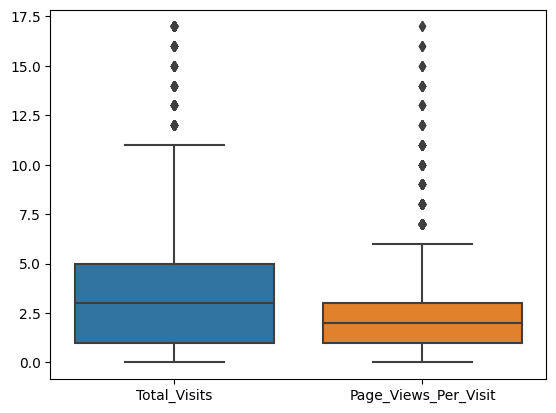

In [99]:
sns.boxplot(df[["Total_Visits", "Page_Views_Per_Visit"]])
plt.show()

#### Outliers of the "Total_Visits", "Page_Views_Per_Visit" are also managed by clipping at 99%


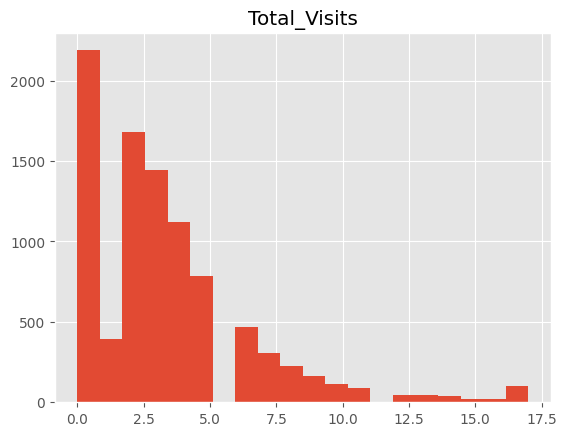

In [100]:
plt.style.use('ggplot')

plt.hist(df.Total_Visits, bins = 20)
plt.title("Total_Visits")
plt.show()

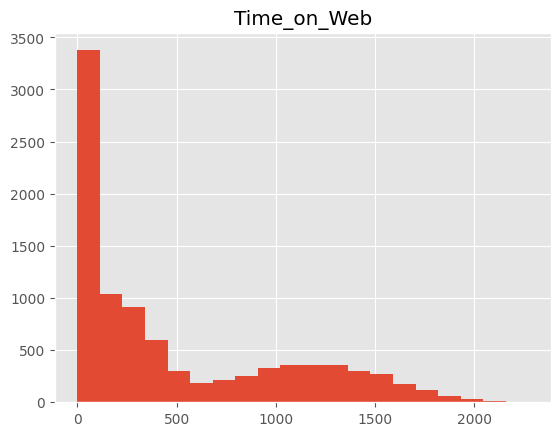

In [101]:
plt.style.use('ggplot')

plt.hist(df.Time_on_Web, bins = 20)
plt.title("Time_on_Web")
plt.show()

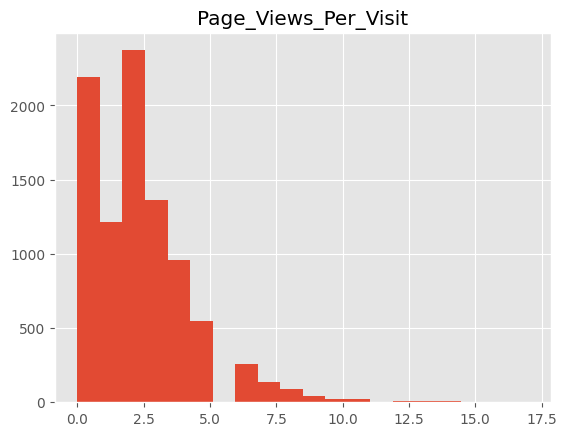

In [102]:
plt.style.use('ggplot')

plt.hist(df.Page_Views_Per_Visit, bins = 20)
plt.title("Page_Views_Per_Visit")
plt.show()

<Axes: >

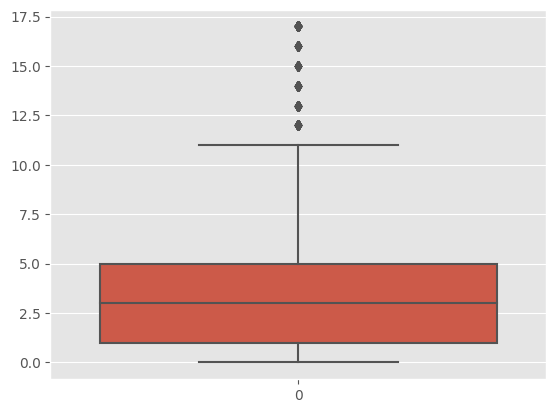

In [103]:
sns.boxplot(df["Total_Visits"])

<Axes: >

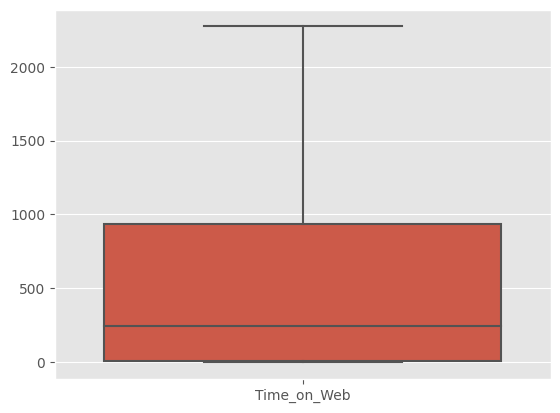

In [104]:
sns.boxplot(df[["Time_on_Web"]])

<Axes: >

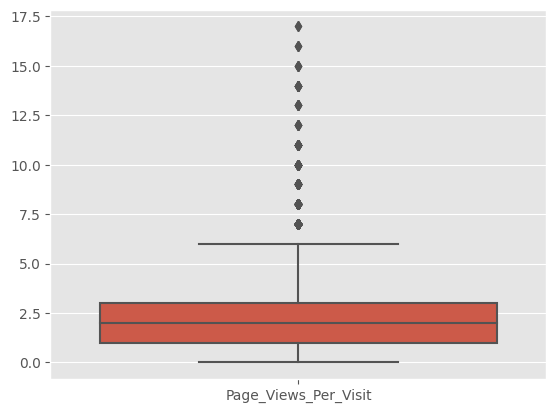

In [105]:
sns.boxplot(df[["Page_Views_Per_Visit"]])

<Axes: >

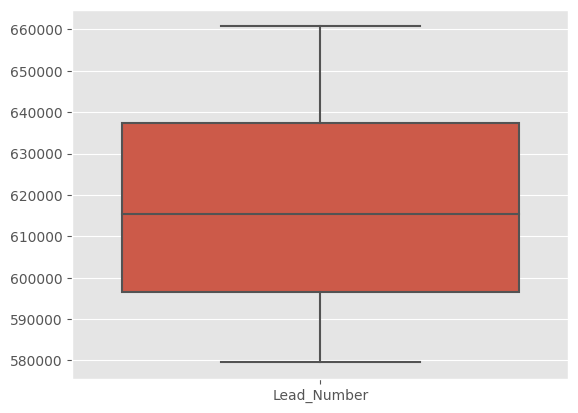

In [106]:
sns.boxplot(df[["Lead_Number"]])

### It is seen that now there is no outlayers in the columns "Lead_Number", "Page_Views_Per_Visit", "Time_on_Web", "Total_Visits".













 
 ## Categorical columns

 
 
 

In [265]:
cat_col=df.select_dtypes(include=["object"])
cat_col

,Lead_Origin,Lead_Source,Do_Not_Email,Specialization,current_occupation,City,Mastering_The_Int
0,API,Olark Chat,No,Management Specializations,Unemployed,Mumbai,No
1,API,Organic Search,No,Management Specializations,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,Business Specializations,Student and Others,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,Industry Specializations,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,Management Specializations,Unemployed,Mumbai,No
...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,Management Specializations,Unemployed,Mumbai,No
9236,Landing Page Submission,Direct Traffic,No,Industry Specializations,Unemployed,Mumbai,Yes
9237,Landing Page Submission,Direct Traffic,Yes,Business Specializations,Unemployed,Mumbai,Yes
9238,Landing Page Submission,Google,No,Management Specializations,Unemployed,Non-Maharashtra Cities,No


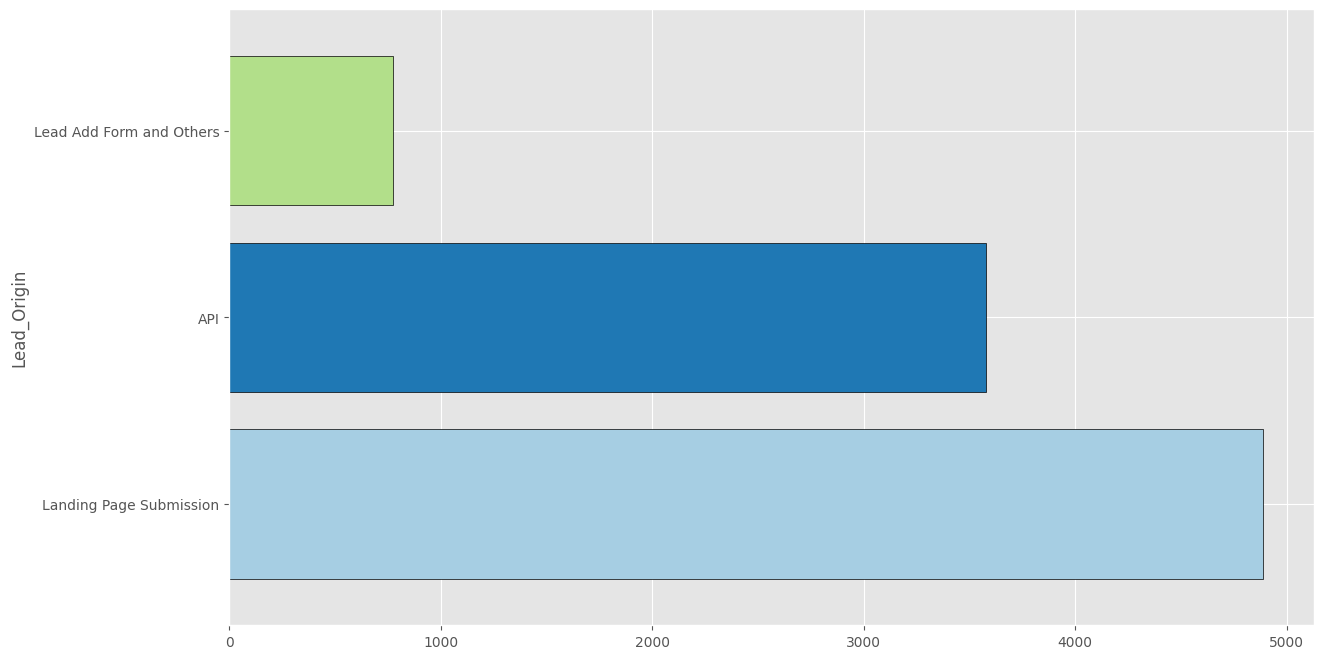

In [108]:
plt.figure(figsize = (14, 8))

df.groupby('Lead_Origin')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', 
                                                                                     width = 0.8, 
                                                                                     edgecolor = 'black', 
                                                                                 color = plt.cm.Paired(np.arange(len(df))))
plt.show()

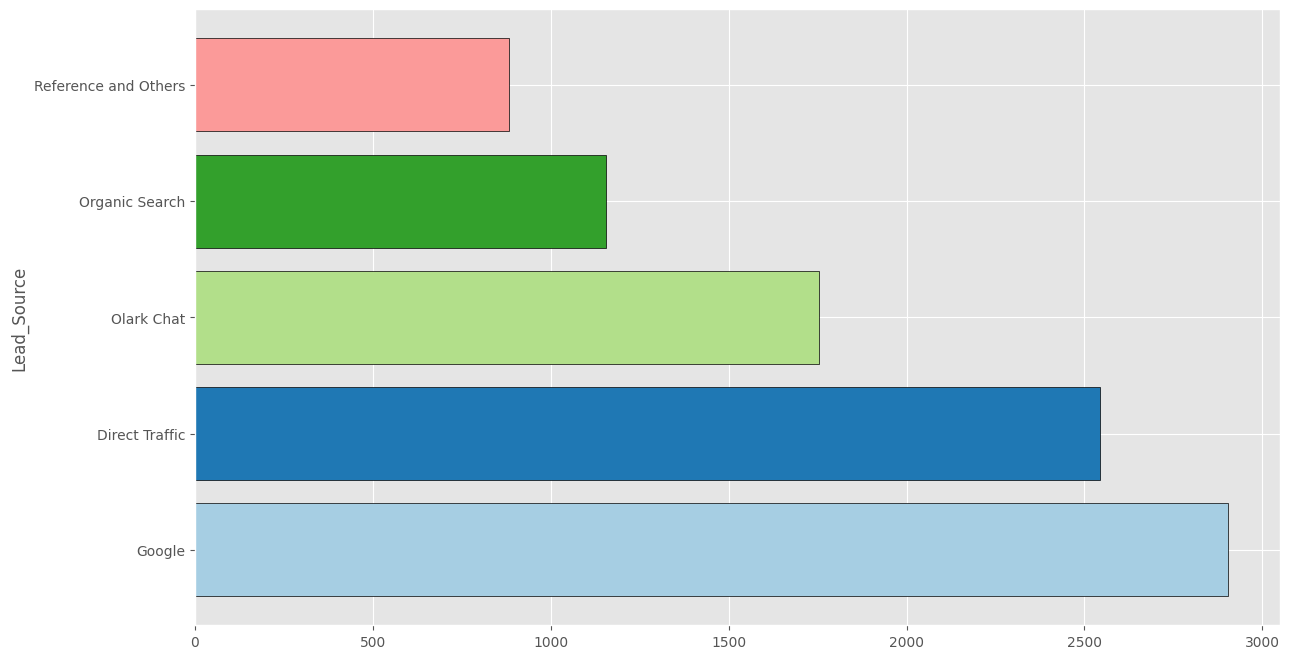

In [109]:
plt.figure(figsize = (14, 8))

df.groupby('Lead_Source')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

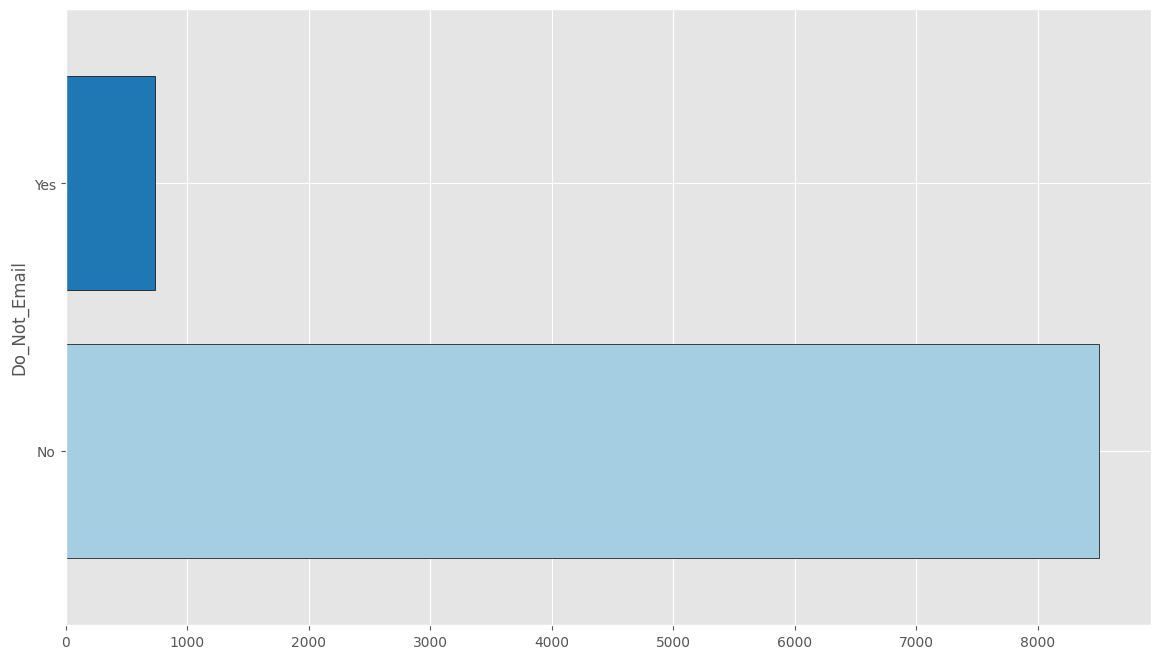

In [266]:
plt.figure(figsize = (14, 8))

df.groupby('Do_Not_Email')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

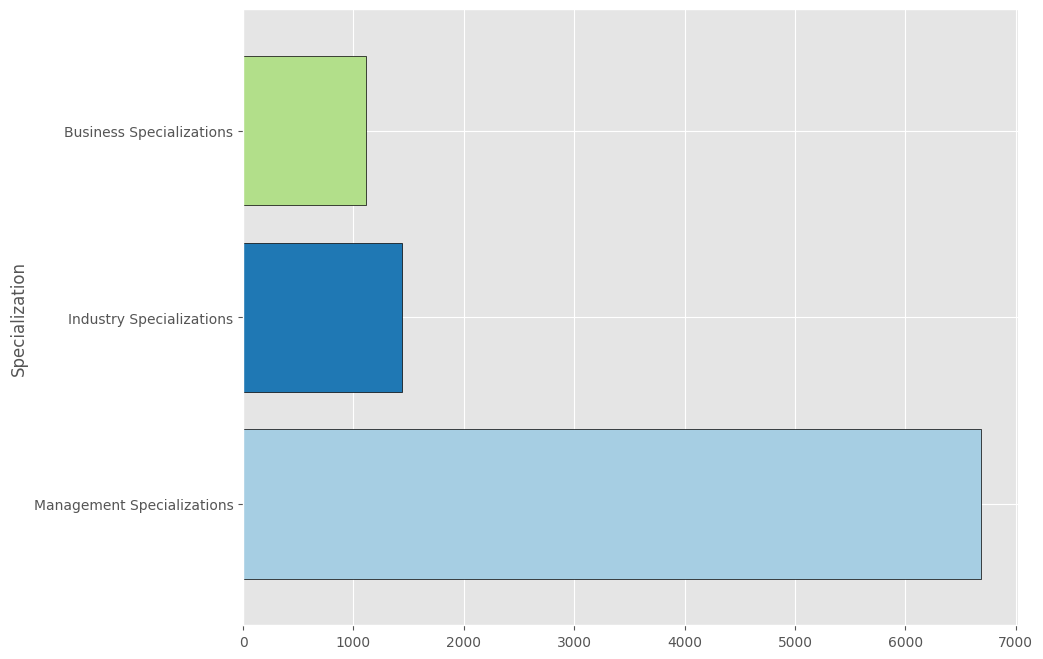

In [110]:
plt.figure(figsize = (10, 8))

df.groupby('Specialization')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

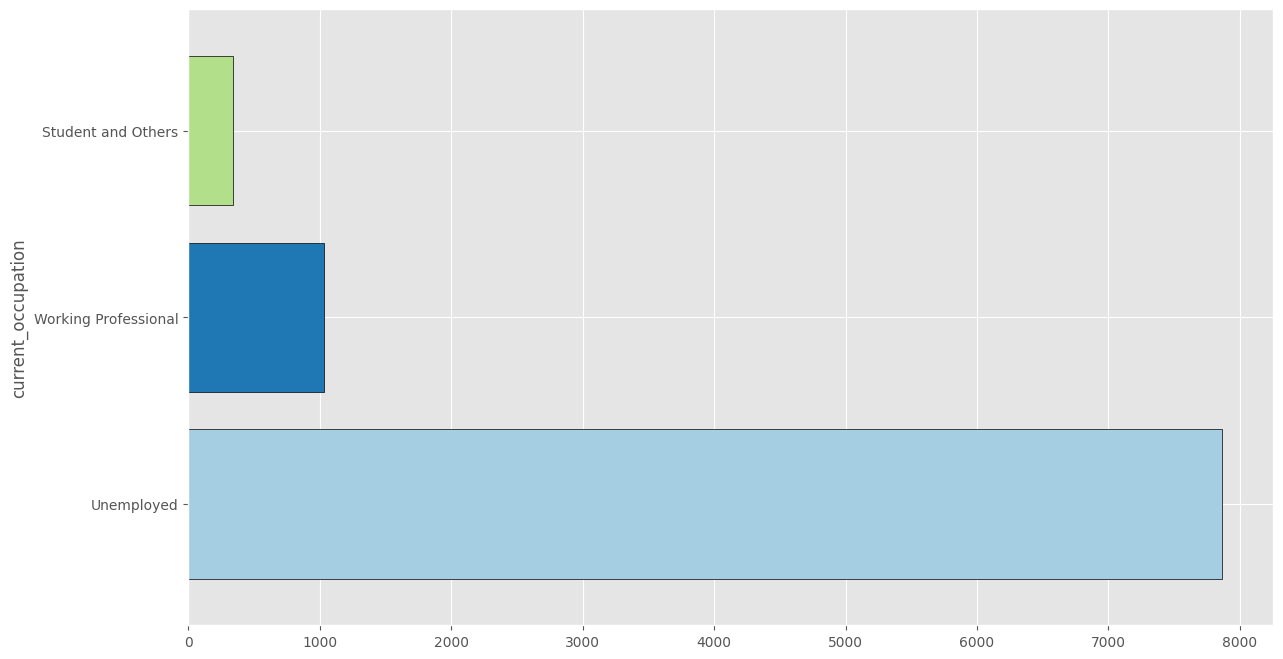

In [111]:
plt.figure(figsize = (14, 8))

df.groupby('current_occupation')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

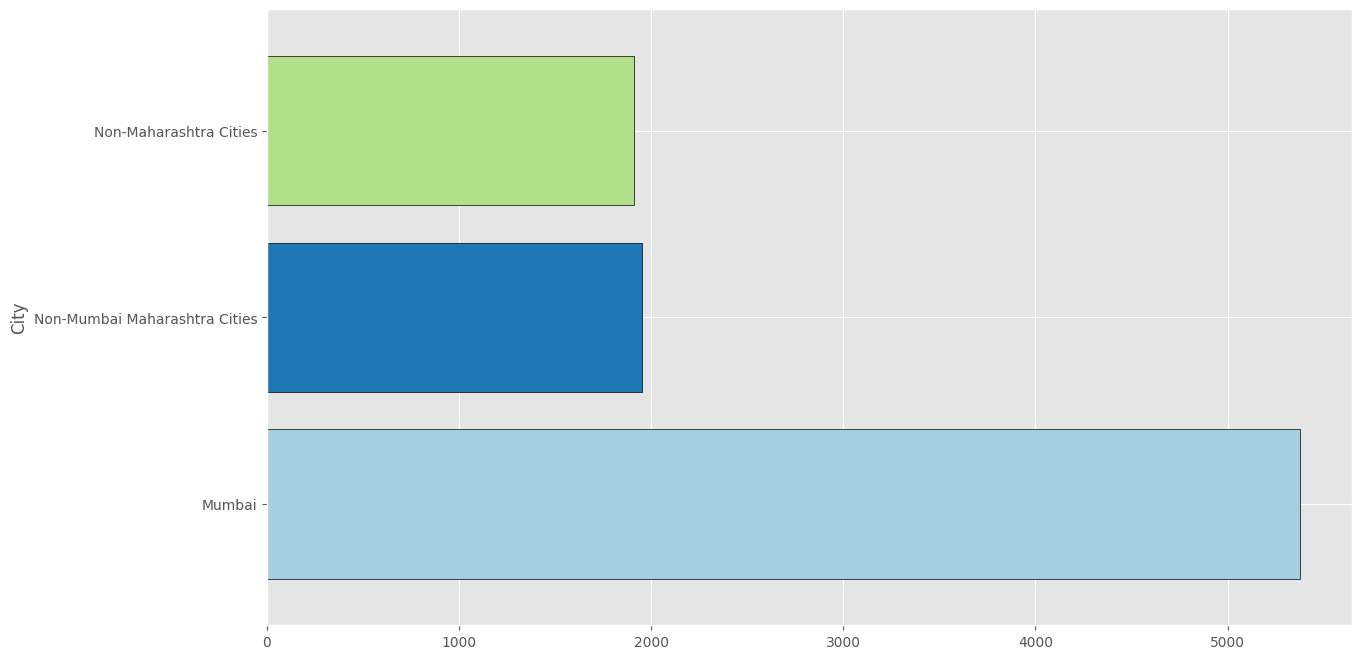

In [112]:
plt.figure(figsize = (14, 8))

df.groupby('City')['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

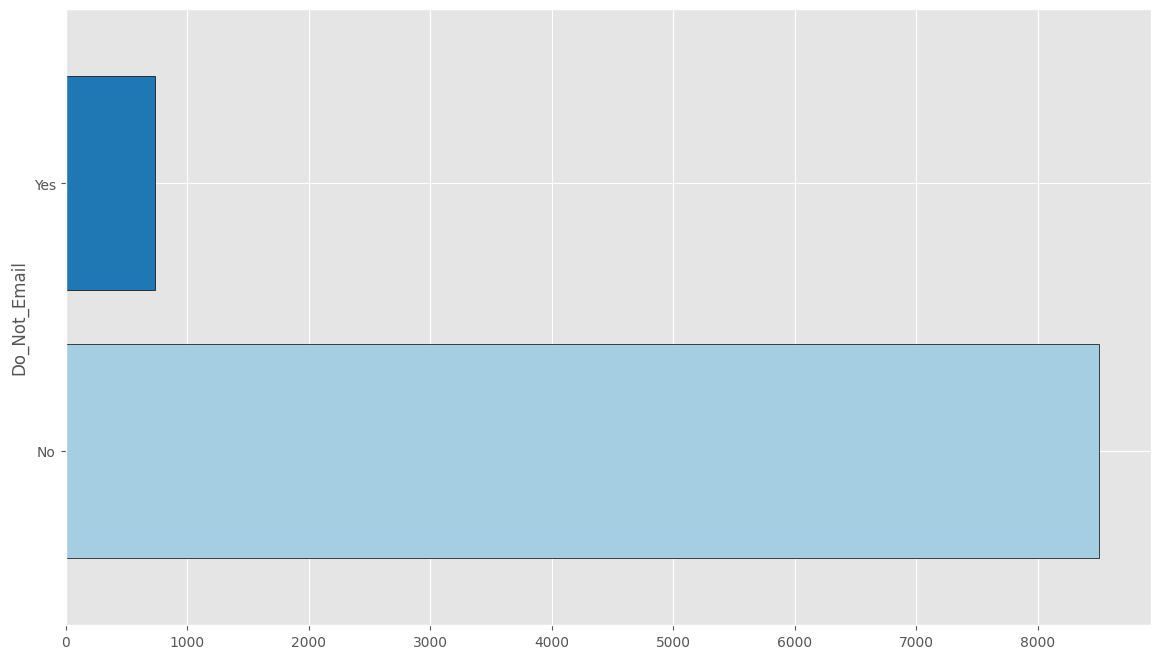

## Converting Binary variables to zero and one

In [114]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [115]:
Bin_list=["Do_Not_Email", "Mastering_The_Int"]

In [116]:
df.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Specialization,current_occupation,City,Mastering_The_Int
0,660737,API,Olark Chat,No,0,0,0.0,0,Management Specializations,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5,674.0,2,Management Specializations,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532.0,2,Business Specializations,Student and Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305.0,1,Industry Specializations,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2,1428.0,1,Industry Specializations,Unemployed,Mumbai,No


In [117]:
df[Bin_list]=df[Bin_list].apply(binary_map)

In [118]:
df.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Specialization,current_occupation,City,Mastering_The_Int
0,660737,API,Olark Chat,0,0,0,0.0,0,Management Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674.0,2,Management Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532.0,2,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305.0,1,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428.0,1,Industry Specializations,Unemployed,Mumbai,0


## Creating Dummy Variable

In [119]:
dummy1 = pd.get_dummies(df[['Lead_Origin', 'Lead_Source', 'Specialization', 'current_occupation', 'City']], drop_first = True)

df = pd.concat([df, dummy1], axis=1)

In [120]:
df.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Specialization,current_occupation,...,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference and Others,Specialization_Industry Specializations,Specialization_Management Specializations,current_occupation_Unemployed,current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,660737,API,Olark Chat,0,0,0,0.0,0,Management Specializations,Unemployed,...,False,True,False,False,False,True,True,False,False,False
1,660728,API,Organic Search,0,0,5,674.0,2,Management Specializations,Unemployed,...,False,False,True,False,False,True,True,False,False,False
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532.0,2,Business Specializations,Student and Others,...,False,False,False,False,False,False,False,False,False,False
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305.0,1,Industry Specializations,Unemployed,...,False,False,False,False,True,False,True,False,False,False
4,660681,Landing Page Submission,Google,0,1,2,1428.0,1,Industry Specializations,Unemployed,...,True,False,False,False,True,False,True,False,False,False


In [121]:
df.drop(['Lead_Origin', 'Lead_Source', 'Specialization', 'current_occupation', 'City'], axis=1, inplace=True)

In [122]:
df.head()

,Lead_Number,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Mastering_The_Int,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form and Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference and Others,Specialization_Industry Specializations,Specialization_Management Specializations,current_occupation_Unemployed,current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0.0,0,0,False,False,False,True,False,False,False,True,True,False,False,False
1,660728,0,0,5,674.0,2,0,False,False,False,False,True,False,False,True,True,False,False,False
2,660727,0,1,2,1532.0,2,1,True,False,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,1,305.0,1,0,True,False,False,False,False,False,True,False,True,False,False,False
4,660681,0,1,2,1428.0,1,0,True,False,True,False,False,False,True,False,True,False,False,False


In [123]:
def Bool_map(x):
    return x.map({False: 0, True: 1})

In [124]:
Bool_col=["Lead_Origin_Landing Page Submission","Lead_Origin_Lead Add Form and Others","Lead_Source_Google","Lead_Source_Olark Chat","Lead_Source_Organic Search","Lead_Source_Reference and Others","Specialization_Industry Specializations","Specialization_Management Specializations","current_occupation_Unemployed","current_occupation_Working Professional","City_Non-Maharashtra Cities","City_Non-Mumbai Maharashtra Cities"]

In [125]:
df[Bool_col]=df[Bool_col].apply(Bool_map)

In [126]:
df.head()

,Lead_Number,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Mastering_The_Int,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form and Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference and Others,Specialization_Industry Specializations,Specialization_Management Specializations,current_occupation_Unemployed,current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0.0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1,660728,0,0,5,674.0,2,0,0,0,0,0,1,0,0,1,1,0,0,0
2,660727,0,1,2,1532.0,2,1,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305.0,1,0,1,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428.0,1,0,1,0,1,0,0,0,1,0,1,0,0,0


In [127]:
df.drop("Lead_Number", axis=1, inplace=True)

<Axes: >

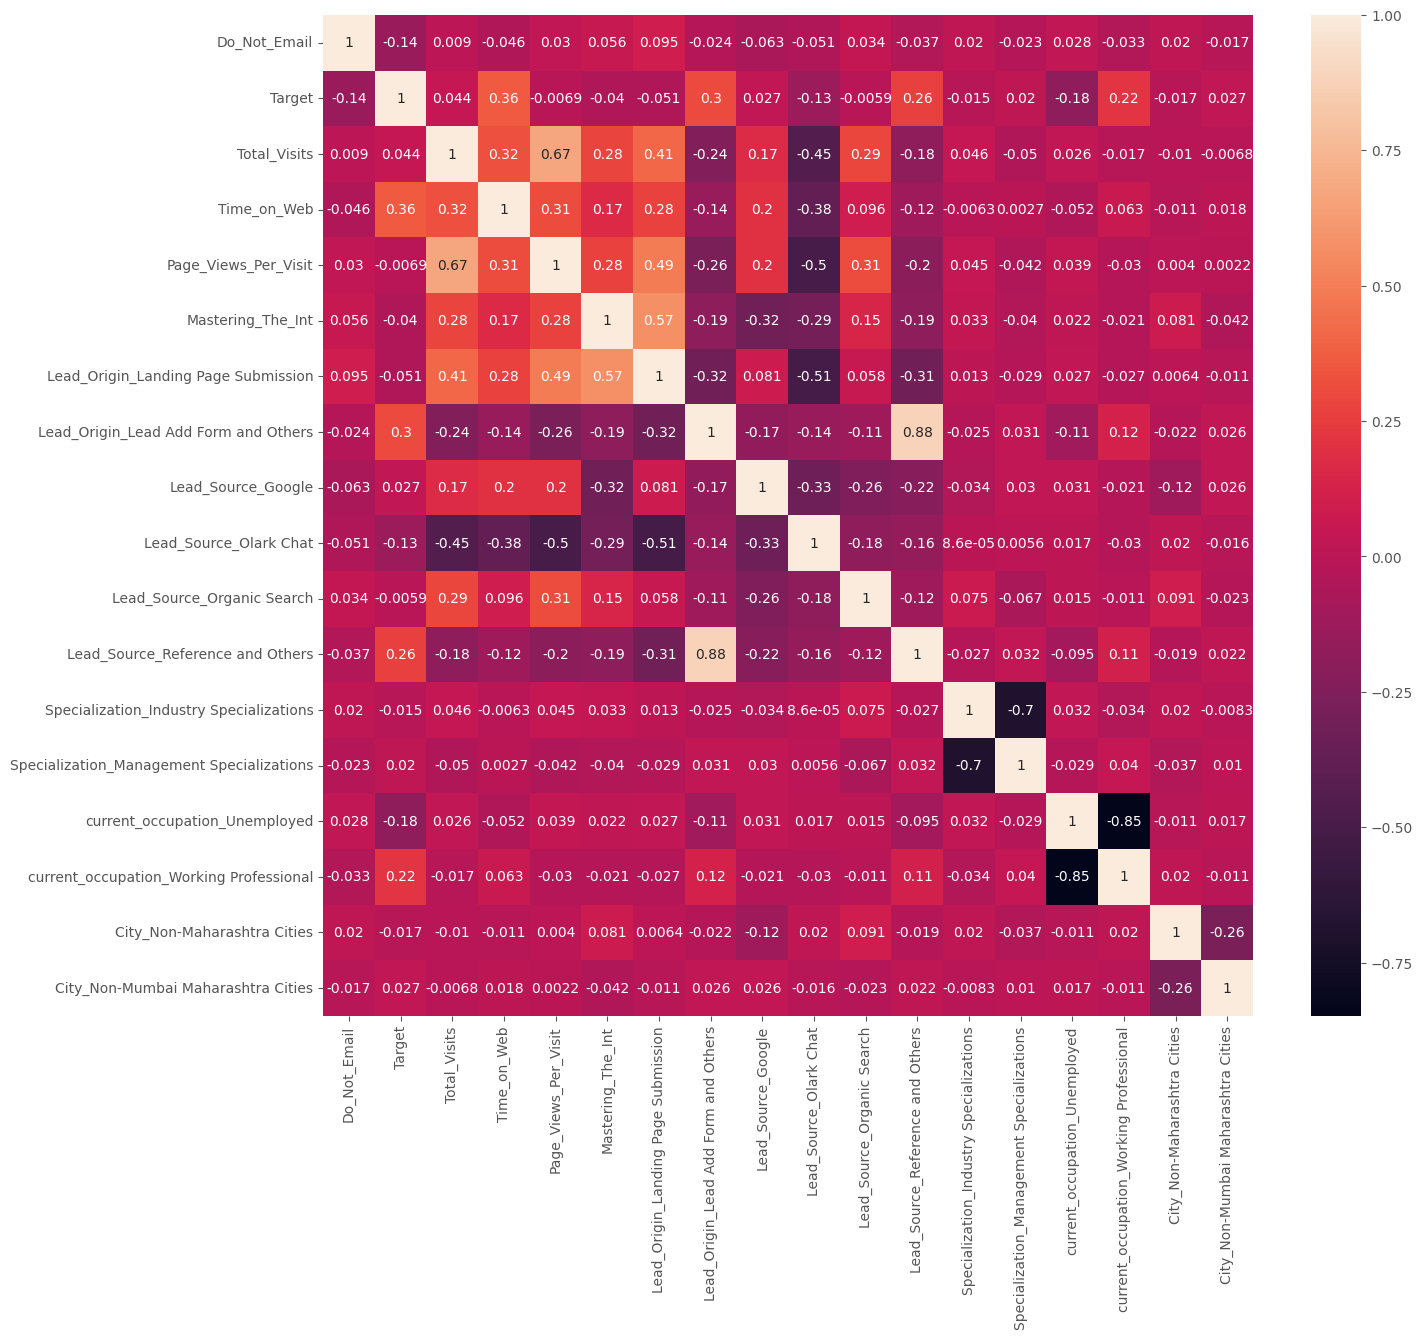

In [128]:
plt.figure(figsize = (15,13))       

sns.heatmap(df.corr(), annot=True)

In [129]:
''' Lead_Origin_Lead Add Form and Others and Lead_Source_Reference and Others are 88% corrilated so can be removeof of the column.
Similary, "current_occupation_Working Professional" and  "current_occupation_Unemployed" are higly negatively corrilated. So, can be remove on colun. "Specialization_Industry Specializations" can also be removed.  '''

' Lead_Origin_Lead Add Form and Others and Lead_Source_Reference and Others are 88% corrilated so can be removeof of the column.\nSimilary, "current_occupation_Working Professional" and  "current_occupation_Unemployed" are higly negatively corrilated. So, can be remove on colun. "Specialization_Industry Specializations" can also be removed.  '

In [130]:
del_col=["Lead_Origin_Lead Add Form and Others", "current_occupation_Unemployed", "Specialization_Industry Specializations"]

In [131]:
df.drop(del_col, axis=1, inplace=True)

<Axes: >

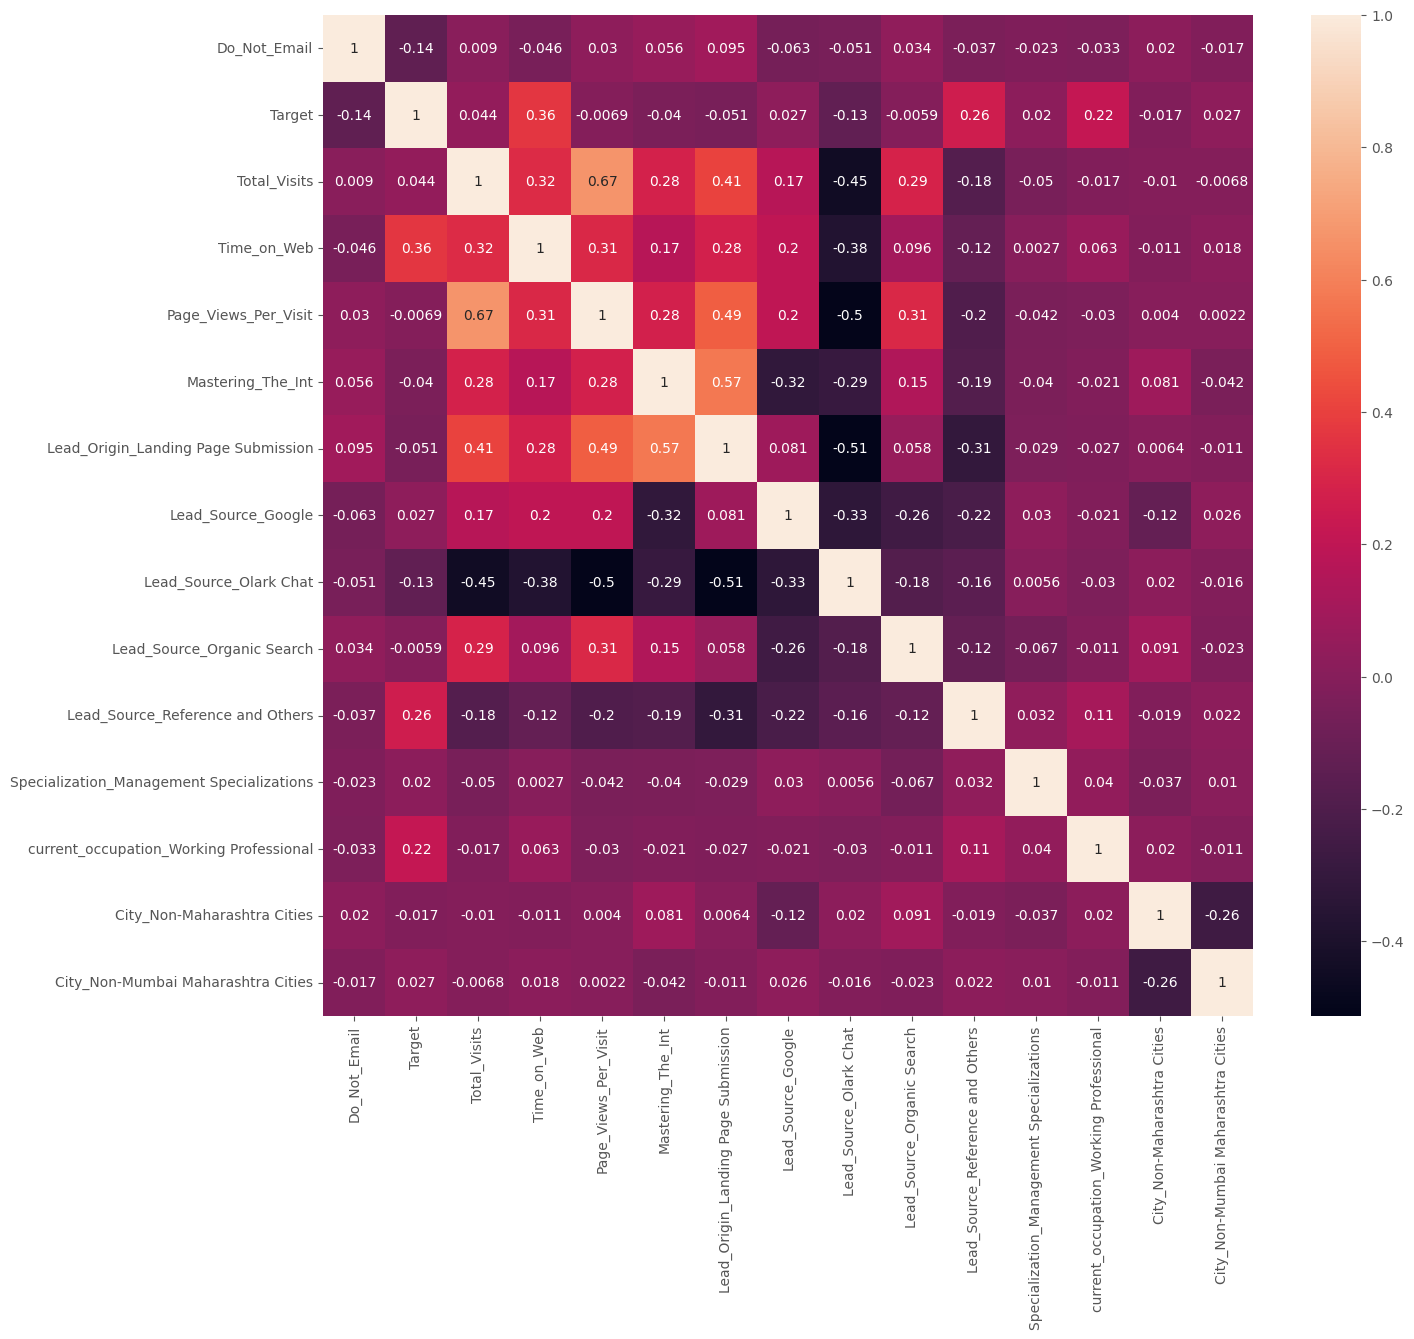

In [132]:
plt.figure(figsize = (15,13))       

sns.heatmap(df.corr(), annot=True)

In [133]:
df.head()

,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Mastering_The_Int,Lead_Origin_Landing Page Submission,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference and Others,Specialization_Management Specializations,current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,0,0,0,0.0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,5,674.0,2,0,0,0,0,1,0,1,0,0,0
2,0,1,2,1532.0,2,1,1,0,0,0,0,0,0,0,0
3,0,0,1,305.0,1,0,1,0,0,0,0,0,0,0,0
4,0,1,2,1428.0,1,0,1,1,0,0,0,0,0,0,0


## Train Test Split

In [134]:
df.head()

,Do_Not_Email,Target,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Mastering_The_Int,Lead_Origin_Landing Page Submission,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference and Others,Specialization_Management Specializations,current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,0,0,0,0.0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,5,674.0,2,0,0,0,0,1,0,1,0,0,0
2,0,1,2,1532.0,2,1,1,0,0,0,0,0,0,0,0
3,0,0,1,305.0,1,0,1,0,0,0,0,0,0,0,0
4,0,1,2,1428.0,1,0,1,1,0,0,0,0,0,0,0


In [135]:
y=df.pop("Target")
X=df.copy()

In [136]:
scaler = StandardScaler()


In [137]:
X[["Total_Visits","Time_on_Web","Page_Views_Per_Visit"]]=scaler.fit_transform(X[["Total_Visits","Time_on_Web","Page_Views_Per_Visit"]])



In [138]:
X.head()

,Do_Not_Email,Total_Visits,Time_on_Web,Page_Views_Per_Visit,Mastering_The_Int,Lead_Origin_Landing Page Submission,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference and Others,Specialization_Management Specializations,current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,0,-1.030828,-0.889974,-1.099451,0,0,0,1,0,0,1,0,0,0
1,0,0.517979,0.339972,-0.136885,0,0,0,0,1,0,1,0,0,0
2,0,-0.411305,1.905689,-0.136885,1,1,0,0,0,0,0,0,0,0
3,0,-0.721067,-0.333396,-0.618168,0,1,0,0,0,0,0,0,0,0
4,0,-0.411305,1.715905,-0.618168,0,1,1,0,0,0,0,0,0,0


In [139]:
X_train,X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, random_state=42)

In [140]:
X_train.shape

(6468, 14)

In [141]:
X_test.shape

(2772, 14)

In [142]:
y_train.shape

(6468,)

In [143]:
y_test.shape

(2772,)

# Model Building


In [144]:
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3397.2
Date:                Fri, 15 Dec 2023   Deviance:                       6794.5
Time:                        11:21:17   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2454
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.0688      0.124     -8.596      0.000      -1.313      -0.825
Do_Not_Email                                 -1.0626      0.138     -7.724      0.000      -1.332      -0.793
Total_Visits                                  0.1005      0.040      2.508      0.012       0.022       0.179
Time_on_Web                                   1.0049      0.035     28.489      0.000       0.936       1.074
Page_Views_Per_Visit                         -0.2065      0.044     -4.652      0.000      -0.293      -0.119
Mastering_The_Int                            -0.0137      0.093     -0.147      0.883      -0.196       0.169
Lead_Origin_Landing Page Submission           0.0334      0.092      0.364      0.715      -0.146       0.213
Lead_Source_Google                            0.3357      0.099      3.383      0.001       0.141       0.530
Lead_Source_Olark Chat                        0.5474      0.135      4.062      0.000       0.283       0.811
Lead_Source_Organic Search                    0.2965      0.113      2.626      0.009       0.075       0.518
Lead_Source_Reference and Others              2.6030      0.151     17.209      0.000       2.307       2.900
Specialization_Management Specializations    -0.0613      0.067     -0.915      0.360      -0.193       0.070
current_occupation_Working Professional       1.2050      0.095     12.622      0.000       1.018       1.392
City_Non-Maharashtra Cities                  -0.0352      0.079     -0.446      0.656      -0.190       0.120
City_Non-Mumbai Maharashtra Cities            0.0806      0.075      1.080      0.280      -0.066       0.227
=============================================================================================================
"""

In [145]:
col=df.columns

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead_Origin_Landing Page Submission,3.80
10,Specialization_Management Specializations,3.07
4,Mastering_The_Int,2.68
3,Page_Views_Per_Visit,2.15
7,Lead_Source_Olark Chat,1.96
1,Total_Visits,1.92
6,Lead_Source_Google,1.91
9,Lead_Source_Reference and Others,1.35
8,Lead_Source_Organic Search,1.33
12,City_Non-Maharashtra Cities,1.33


### All Vif scores are good.but there arefew columns with high p_value. Lets removeone by one and then we will evaluate

In [147]:
X_train.drop("Mastering_The_Int", axis=1, inplace=True)
X_test.drop("Mastering_The_Int", axis=1, inplace=True)

In [148]:
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3397.3
Date:                Fri, 15 Dec 2023   Deviance:                       6794.5
Time:                        11:21:17   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2454
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.0754      0.116     -9.248      0.000      -1.303      -0.847
Do_Not_Email                                 -1.0616      0.137     -7.726      0.000      -1.331      -0.792
Total_Visits                                  0.1000      0.040      2.506      0.012       0.022       0.178
Time_on_Web                                   1.0047      0.035     28.498      0.000       0.936       1.074
Page_Views_Per_Visit                         -0.2062      0.044     -4.650      0.000      -0.293      -0.119
Lead_Origin_Landing Page Submission           0.0291      0.087      0.335      0.738      -0.141       0.199
Lead_Source_Google                            0.3433      0.085      4.041      0.000       0.177       0.510
Lead_Source_Olark Chat                        0.5527      0.130      4.259      0.000       0.298       0.807
Lead_Source_Organic Search                    0.2989      0.112      2.675      0.007       0.080       0.518
Lead_Source_Reference and Others              2.6087      0.146     17.826      0.000       2.322       2.896
Specialization_Management Specializations    -0.0611      0.067     -0.912      0.362      -0.192       0.070
current_occupation_Working Professional       1.2053      0.095     12.626      0.000       1.018       1.392
City_Non-Maharashtra Cities                  -0.0356      0.079     -0.451      0.652      -0.190       0.119
City_Non-Mumbai Maharashtra Cities            0.0810      0.075      1.086      0.277      -0.065       0.227
=============================================================================================================
"""

In [149]:
X_train.drop("Specialization_Management Specializations", axis=1, inplace=True)
X_test.drop("Specialization_Management Specializations", axis=1, inplace=True)

In [150]:
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3397.7
Date:                Fri, 15 Dec 2023   Deviance:                       6795.4
Time:                        11:21:17   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2453
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1197      0.106    -10.591      0.000      -1.327      -0.912
Do_Not_Email                               -1.0581      0.137     -7.709      0.000      -1.327      -0.789
Total_Visits                                0.1009      0.040      2.531      0.011       0.023       0.179
Time_on_Web                                 1.0041      0.035     28.492      0.000       0.935       1.073
Page_Views_Per_Visit                       -0.2059      0.044     -4.642      0.000      -0.293      -0.119
Lead_Origin_Landing Page Submission         0.0294      0.087      0.338      0.735      -0.141       0.200
Lead_Source_Google                          0.3421      0.085      4.029      0.000       0.176       0.509
Lead_Source_Olark Chat                      0.5527      0.130      4.259      0.000       0.298       0.807
Lead_Source_Organic Search                  0.3035      0.112      2.720      0.007       0.085       0.522
Lead_Source_Reference and Others            2.6076      0.146     17.820      0.000       2.321       2.894
current_occupation_Working Professional     1.2003      0.095     12.598      0.000       1.014       1.387
City_Non-Maharashtra Cities                -0.0341      0.079     -0.432      0.666      -0.189       0.121
City_Non-Mumbai Maharashtra Cities          0.0811      0.075      1.087      0.277      -0.065       0.227
===========================================================================================================
"""

In [151]:
X_train.drop("City_Non-Maharashtra Cities", axis=1, inplace=True)
X_test.drop("City_Non-Maharashtra Cities", axis=1, inplace=True)

In [152]:
logreg4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3397.8
Date:                Fri, 15 Dec 2023   Deviance:                       6795.5
Time:                        11:21:18   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2453
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1296      0.103    -10.944      0.000      -1.332      -0.927
Do_Not_Email                               -1.0583      0.137     -7.710      0.000      -1.327      -0.789
Total_Visits                                0.1014      0.040      2.544      0.011       0.023       0.180
Time_on_Web                                 1.0041      0.035     28.494      0.000       0.935       1.073
Page_Views_Per_Visit                       -0.2062      0.044     -4.650      0.000      -0.293      -0.119
Lead_Origin_Landing Page Submission         0.0296      0.087      0.341      0.733      -0.141       0.200
Lead_Source_Google                          0.3457      0.085      4.089      0.000       0.180       0.511
Lead_Source_Olark Chat                      0.5542      0.130      4.271      0.000       0.300       0.808
Lead_Source_Organic Search                  0.3011      0.111      2.702      0.007       0.083       0.520
Lead_Source_Reference and Others            2.6099      0.146     17.846      0.000       2.323       2.897
current_occupation_Working Professional     1.1992      0.095     12.591      0.000       1.012       1.386
City_Non-Mumbai Maharashtra Cities          0.0895      0.072      1.244      0.214      -0.052       0.231
===========================================================================================================
"""

In [153]:
X_train.drop("Lead_Origin_Landing Page Submission", axis=1, inplace=True)
X_test.drop("Lead_Origin_Landing Page Submission", axis=1, inplace=True)

In [154]:
logreg4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3397.8
Date:                Fri, 15 Dec 2023   Deviance:                       6795.7
Time:                        11:21:18   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2452
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1020      0.064    -17.156      0.000      -1.228      -0.976
Do_Not_Email                               -1.0572      0.137     -7.704      0.000      -1.326      -0.788
Total_Visits                                0.1019      0.040      2.560      0.010       0.024       0.180
Time_on_Web                                 1.0041      0.035     28.493      0.000       0.935       1.073
Page_Views_Per_Visit                       -0.2030      0.043     -4.684      0.000      -0.288      -0.118
Lead_Source_Google                          0.3345      0.078      4.294      0.000       0.182       0.487
Lead_Source_Olark Chat                      0.5303      0.109      4.854      0.000       0.316       0.744
Lead_Source_Organic Search                  0.2886      0.105      2.743      0.006       0.082       0.495
Lead_Source_Reference and Others            2.5863      0.129     20.098      0.000       2.334       2.838
current_occupation_Working Professional     1.1993      0.095     12.593      0.000       1.013       1.386
City_Non-Mumbai Maharashtra Cities          0.0891      0.072      1.238      0.216      -0.052       0.230
===========================================================================================================
"""

In [155]:
X_train.drop("City_Non-Mumbai Maharashtra Cities", axis=1, inplace=True)
X_test.drop("City_Non-Mumbai Maharashtra Cities", axis=1, inplace=True)

In [156]:
logreg5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3398.6
Date:                Fri, 15 Dec 2023   Deviance:                       6797.2
Time:                        11:21:18   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2451
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0829      0.062    -17.389      0.000      -1.205      -0.961
Do_Not_Email                               -1.0585      0.137     -7.717      0.000      -1.327      -0.790
Total_Visits                                0.1018      0.040      2.557      0.011       0.024       0.180
Time_on_Web                                 1.0041      0.035     28.498      0.000       0.935       1.073
Page_Views_Per_Visit                       -0.2025      0.043     -4.673      0.000      -0.287      -0.118
Lead_Source_Google                          0.3359      0.078      4.314      0.000       0.183       0.489
Lead_Source_Olark Chat                      0.5302      0.109      4.855      0.000       0.316       0.744
Lead_Source_Organic Search                  0.2873      0.105      2.730      0.006       0.081       0.494
Lead_Source_Reference and Others            2.5909      0.129     20.141      0.000       2.339       2.843
current_occupation_Working Professional     1.1980      0.095     12.576      0.000       1.011       1.385
===========================================================================================================
"""

### Hence we obtain that the top 9 features whixh significatly effect thelead score. 